<center><img src="../../../images/logistic_regression.png" alt="linear_regression" width="1000"/></center>

In [2]:
import pandas as pd 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , StratifiedKFold
from  sklearn.metrics import classification_report , confusion_matrix ,ConfusionMatrixDisplay , accuracy_score

In [68]:
# Lets Predict which crop to grow based on parameters in data 

In [69]:
data = pd.read_csv('../../../datasets/Crop_Recommendation.csv')
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [71]:
data.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [72]:
data['Crop'].value_counts() # good..! here all data is in equal distribution 
# why is it important ? 
# well if data have unequal distribution some label may get biased by model 
#( ex. if in classification of cat and dog if cat labels are more than that of dog model will predict cat more accurately than dog)

Crop
Rice           100
Maize          100
ChickPea       100
KidneyBeans    100
PigeonPeas     100
MothBeans      100
MungBean       100
Blackgram      100
Lentil         100
Pomegranate    100
Banana         100
Mango          100
Grapes         100
Watermelon     100
Muskmelon      100
Apple          100
Orange         100
Papaya         100
Coconut        100
Cotton         100
Jute           100
Coffee         100
Name: count, dtype: int64

In [73]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [74]:
x = data.drop(columns='Crop')
x.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [75]:
y = data['Crop']
y.head()

0    Rice
1    Rice
2    Rice
3    Rice
4    Rice
Name: Crop, dtype: object

In [76]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=23,stratify=y)

# Logistic Regression

In [77]:
model = LogisticRegression(solver='liblinear')

In [78]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [79]:
y_pred = model.predict(x_test)

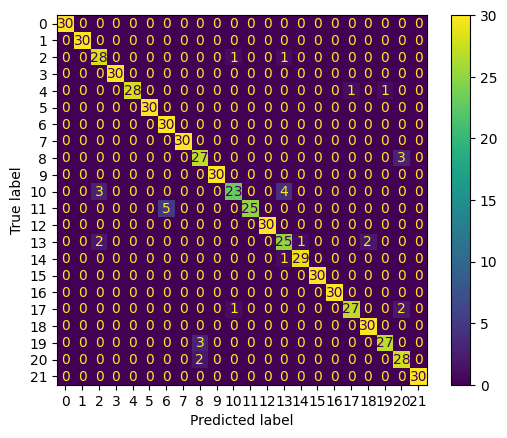

In [80]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
# here 0,1,2,3...21 are both labels 
# on X axis are predicted label and on y axis are true label 
# we are comparing how many predicted class are equal to true class from graph 

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        30
      Banana       1.00      1.00      1.00        30
   Blackgram       0.85      0.93      0.89        30
    ChickPea       1.00      1.00      1.00        30
     Coconut       1.00      0.93      0.97        30
      Coffee       1.00      1.00      1.00        30
      Cotton       0.86      1.00      0.92        30
      Grapes       1.00      1.00      1.00        30
        Jute       0.84      0.90      0.87        30
 KidneyBeans       1.00      1.00      1.00        30
      Lentil       0.92      0.77      0.84        30
       Maize       1.00      0.83      0.91        30
       Mango       1.00      1.00      1.00        30
   MothBeans       0.81      0.83      0.82        30
    MungBean       0.97      0.97      0.97        30
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        30
      Papaya       0.96    

In [82]:
accuracy_score(y_test,y_pred)

0.95

## Logistic Regression with Parameter Tuning 

In [44]:
kfold = StratifiedKFold(n_splits=5)

In [48]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

In [58]:
gcv = GridSearchCV(estimator=LogisticRegression(),param_grid=parameters,cv=kfold,verbose=2,scoring='accuracy')

In [ ]:
gcv.fit(x_train,y_train)

In [60]:
best_params = gcv.best_params_
best_score = gcv.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score) 
# we increased accuracy from 95 to 96 by trying different combination like this we can improve model accuracy 
# although same parameters will produce different result on different data so its a trial and error method 

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy Score: 0.9642857142857142


In [61]:
new_model = gcv.best_estimator_
y_pred = new_model(x_test)

In [63]:
y_pred = new_model.predict(x_test)

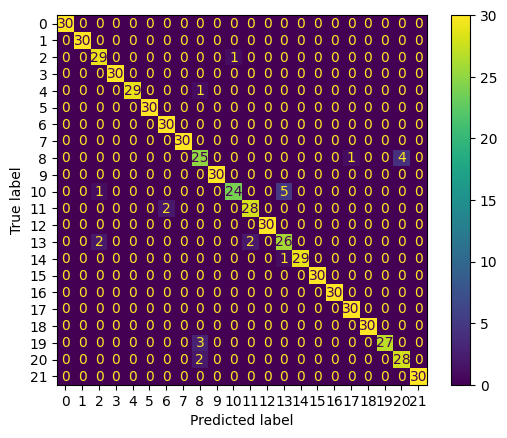

In [64]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        30
      Banana       1.00      1.00      1.00        30
   Blackgram       0.91      0.97      0.94        30
    ChickPea       1.00      1.00      1.00        30
     Coconut       1.00      0.97      0.98        30
      Coffee       1.00      1.00      1.00        30
      Cotton       0.94      1.00      0.97        30
      Grapes       1.00      1.00      1.00        30
        Jute       0.81      0.83      0.82        30
 KidneyBeans       1.00      1.00      1.00        30
      Lentil       0.96      0.80      0.87        30
       Maize       0.93      0.93      0.93        30
       Mango       1.00      1.00      1.00        30
   MothBeans       0.81      0.87      0.84        30
    MungBean       1.00      0.97      0.98        30
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        30
      Papaya       0.97    